In [1]:
import pandas
import datetime
import math
import os
import numpy
from scipy import signal, ndimage
from davitpy.models import *
from davitpy import utils
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
import seaborn as sns
%matplotlib inline

In [2]:
def convert_to_datetime(row):
    currDateStr = str( int( row["dateStr"] ) )
#     return currDateStr
    if row["timeStr"] < 10:
        currTimeStr = "000" + str( int( row["timeStr"] ) )
    elif row["timeStr"] < 100:
        currTimeStr = "00" + str( int( row["timeStr"] ) )
    elif row["timeStr"] < 1000:
        currTimeStr = "0" + str( int( row["timeStr"] ) )
    else:
        currTimeStr = str( int( row["timeStr"] ) )
    return datetime.datetime.strptime( currDateStr\
                    + ":" + currTimeStr, "%Y%m%d:%H%M" )

selDT = datetime.datetime( 2011, 4, 9, 9, 0 )
anlyzCoords = 'mag'

In [3]:
inpColList = [ "dateStr", "timeStr", "Mlat",\
              "Mlon", "med_tec", "dlat", "dlon" ]
inpFile = "/home/bharat/Documents/"+\
            "medFiltTec/tec-medFilt-20110409.txt"
medFiltTECDF = pandas.read_csv(inpFile, delim_whitespace=True,\
                                    header=None, names=inpColList)
medFiltTECDF["date"] = medFiltTECDF.apply( convert_to_datetime, axis=1 )
medFiltTECDF.head()

dateStr  timeStr  Mlat  Mlon  med_tec  dlat  dlon                date
0  20110409      800  11.0  34.0      4.9   1.0   2.0 2011-04-09 08:00:00
1  20110409      800  11.0  36.0      7.2   1.0   2.0 2011-04-09 08:00:00
2  20110409      800  11.0  38.0      7.3   1.0   2.0 2011-04-09 08:00:00
3  20110409      800  11.0  64.0     19.0   1.0   2.0 2011-04-09 08:00:00
4  20110409      800  11.0  66.0     19.3   1.0   2.0 2011-04-09 08:00:00

In [4]:
# Analyze the selected time
selTecDF = medFiltTECDF[ medFiltTECDF["date"] == selDT ].reset_index(drop=True)
selTecDF.head()

dateStr  timeStr  Mlat  Mlon  med_tec  dlat  dlon                date
0  20110409      900  11.0  32.0     10.8   1.0   2.0 2011-04-09 09:00:00
1  20110409      900  11.0  34.0     11.9   1.0   2.0 2011-04-09 09:00:00
2  20110409      900  11.0  70.0     33.0   1.0   2.0 2011-04-09 09:00:00
3  20110409      900  11.0  72.0     34.0   1.0   2.0 2011-04-09 09:00:00
4  20110409      900  11.0  74.0     34.8   1.0   2.0 2011-04-09 09:00:00

/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


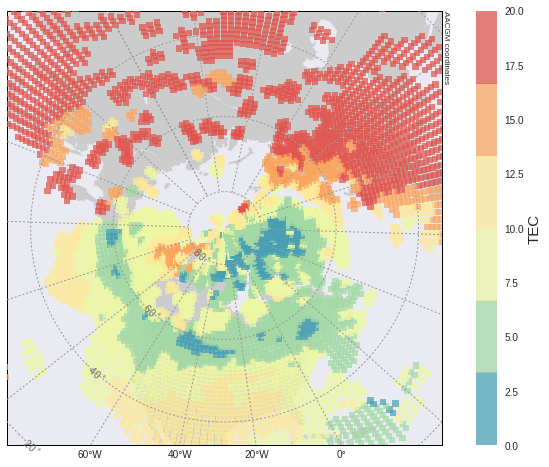

In [5]:
# set colorbar
seaMap = ListedColormap(sns.color_palette("Spectral_r"))
# flatui = ["#3182bd", "#9ecae1", "#7fcdbb", "#ffeda0", "#feb24c", "#f03b20"]
# sns.set_palette(flatui)
# seaMap = ListedColormap( sns.color_palette() )
# Plot map
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(1,1,1)
m1 = utils.plotUtils.mapObj(boundinglat=30., gridLabels=True, coords=anlyzCoords, ax=ax, datetime=selDT)
xVec, yVec = m1(list(selTecDF["Mlon"]), list(selTecDF["Mlat"]), coords=anlyzCoords)
tecPlot = m1.scatter( xVec, yVec , c=selTecDF["med_tec"], s=40.,\
           cmap=seaMap, alpha=0.7, zorder=5., \
                     edgecolor='none', marker="s", vmin=0., vmax=20. )

cbar = plt.colorbar(tecPlot, orientation='vertical')
cbar.set_label('TEC', size=15)

In [ ]:
def get_tec_file_from_date(self, inpDate):
        """
        Given a time return the name of the tec file
        containing data for that time.
        """
        import os
        fileDtStr = inpDate.strftime("%y%m%d")
        for root, dirs, files in os.walk(self.mfTecDir):
            for fName in files:
                if fName.find(fileDtStr) != -1:
                    return root + "/" + fName
        print "No File FOUND for date-->", inpDate
        return None